# Predicting Forest Cover Types from Cartographic Variables

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [4]:
forest = pd.read_table("data/covtype.data", sep=",")
cover_types = ['Spruce/fir','Lodgepole pine','Ponderosa pine','Cottonwood/willow','Aspen','Douglas-fir','Krummholz']

In [5]:
forest.columns = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points',
'Wilderness_Area1',
'Wilderness_Area2',
'Wilderness_Area3',
'Wilderness_Area4',
'Soil_Type1',
'Soil_Type2',
'Soil_Type3',
'Soil_Type4',
'Soil_Type5',
'Soil_Type6',
'Soil_Type7',
'Soil_Type8',
'Soil_Type9',
'Soil_Type10',
'Soil_Type11',
'Soil_Type12',
'Soil_Type13',
'Soil_Type14',
'Soil_Type15',
'Soil_Type16',
'Soil_Type17',
'Soil_Type18',
'Soil_Type19',
'Soil_Type20',
'Soil_Type21',
'Soil_Type22',
'Soil_Type23',
'Soil_Type24',
'Soil_Type25',
'Soil_Type26',
'Soil_Type27',
'Soil_Type28',
'Soil_Type29',
'Soil_Type30',
'Soil_Type31',
'Soil_Type32',
'Soil_Type33',
'Soil_Type34',
'Soil_Type35',
'Soil_Type36',
'Soil_Type37',
'Soil_Type38',
'Soil_Type39',
'Soil_Type40',
'Cover_Type']

In [6]:
print('Data Size:')
print('Number of Rows:', forest.shape[0])
print('Number of Attributes:', forest.shape[1])

Data Size:
Number of Rows: 581011
Number of Attributes: 55


In [7]:
print(forest.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
Elevation                             581011 non-null int64
Aspect                                581011 non-null int64
Slope                                 581011 non-null int64
Horizontal_Distance_To_Hydrology      581011 non-null int64
Vertical_Distance_To_Hydrology        581011 non-null int64
Horizontal_Distance_To_Roadways       581011 non-null int64
Hillshade_9am                         581011 non-null int64
Hillshade_Noon                        581011 non-null int64
Hillshade_3pm                         581011 non-null int64
Horizontal_Distance_To_Fire_Points    581011 non-null int64
Wilderness_Area1                      581011 non-null int64
Wilderness_Area2                      581011 non-null int64
Wilderness_Area3                      581011 non-null int64
Wilderness_Area4                      581011 non-null int64
Soil_Type1                            581011 non-

In [8]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
# Checking how much skewed is data from normal distribution
print('Skewness of the below features:')
print(forest.skew())

Skewness of the below features:
Elevation                              -0.817602
Aspect                                  0.402625
Slope                                   0.789274
Horizontal_Distance_To_Hydrology        1.140436
Vertical_Distance_To_Hydrology          1.790248
Horizontal_Distance_To_Roadways         0.713678
Hillshade_9am                          -1.181144
Hillshade_Noon                         -1.063054
Hillshade_3pm                          -0.277052
Horizontal_Distance_To_Fire_Points      1.288636
Wilderness_Area1                        0.205622
Wilderness_Area2                        4.061591
Wilderness_Area3                        0.257819
Wilderness_Area4                        3.575557
Soil_Type1                             13.736658
Soil_Type2                              8.615351
Soil_Type3                             10.838621
Soil_Type4                              6.625170
Soil_Type5                             18.995227
Soil_Type6                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

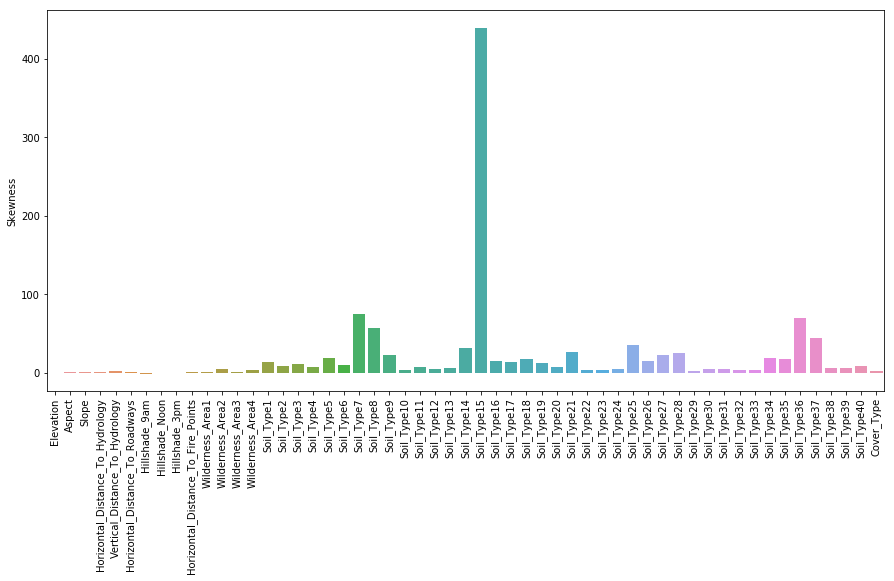

In [10]:
skew=forest.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)


In [11]:
# Some variables are too much right skewed, they may need to be treated later!

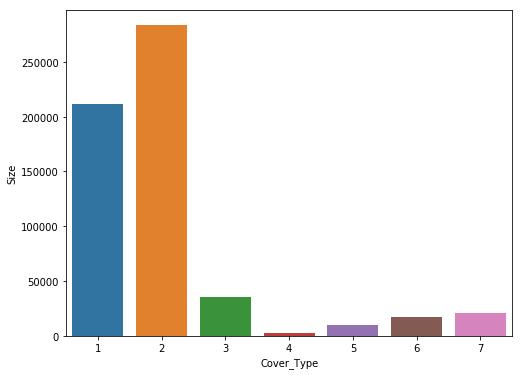

In [12]:
# class distribution

class_dist=forest.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

In [13]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i], cover_types[i])
    print('%.2f'% percent,'%')

Cover_Type 1 Spruce/fir
36.46 %
Cover_Type 2 Lodgepole pine
48.76 %
Cover_Type 3 Ponderosa pine
6.15 %
Cover_Type 4 Cottonwood/willow
0.47 %
Cover_Type 5 Aspen
1.63 %
Cover_Type 6 Douglas-fir
2.99 %
Cover_Type 7 Krummholz
3.53 %


In [14]:
# Cover type 1 & 2 are most dominating  

In [15]:
# Coorelation 
# will check only non binary ( continuous variables).

# number of continuous features
size = 10 

#select first 10 columns from our dataset
data=forest.iloc[:,:size] 

#All columns
cols=data.columns 

# calculating pearsons's co-efficient for all combination of continous variables.
data_corr = data.corr()


print('-------------------------------')

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#fetch the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA


-------------------------------
Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


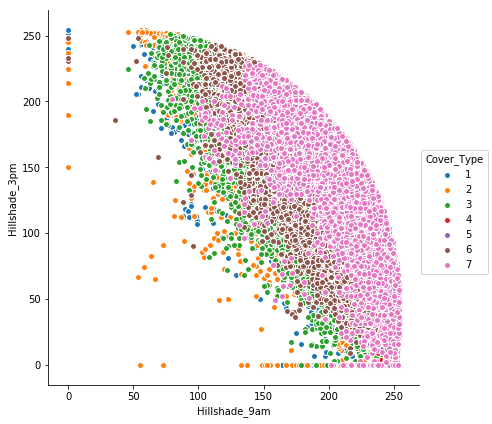

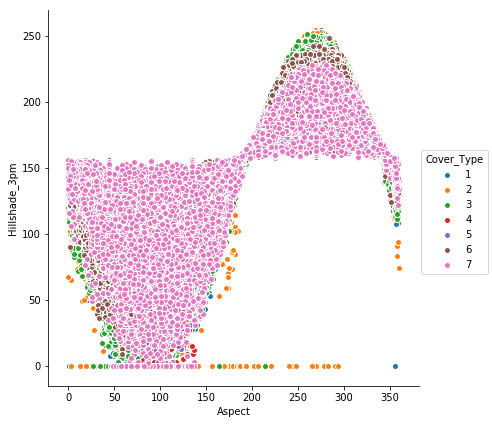

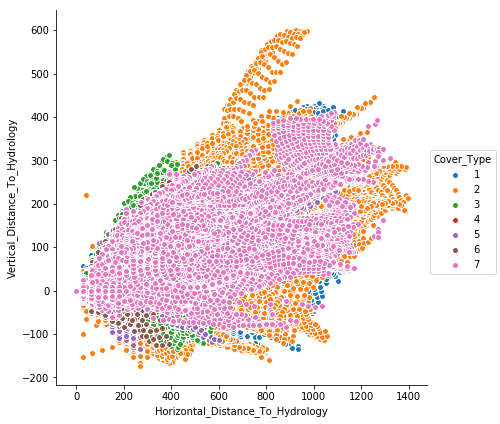

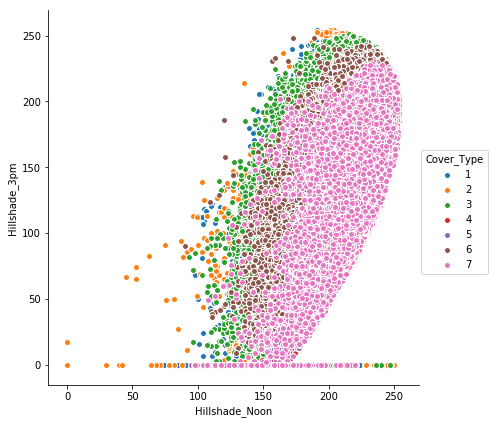

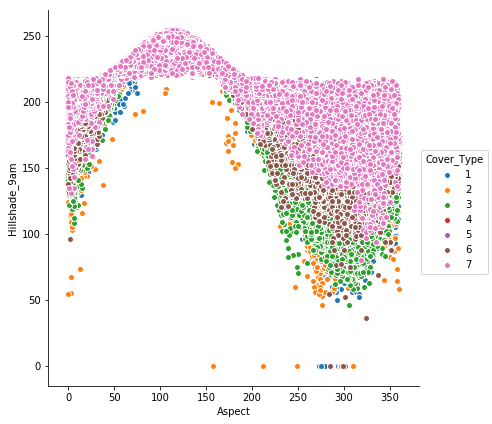

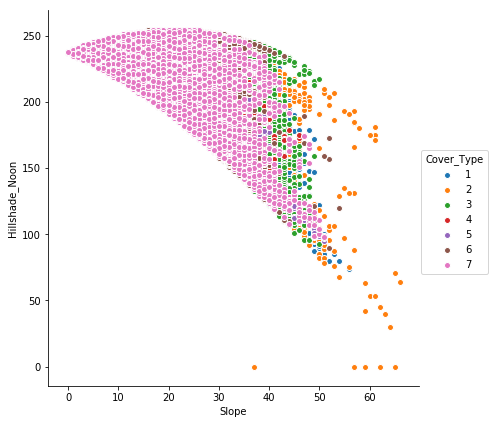

In [16]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(forest, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

# The color of each point, represents its cover type
# It can be seen that cover type are dominated with, cover type 1 & 2. 
# Hillshade patterns give a nice ellipsoid patterns with each other
# Aspect and Hillshades attributes form a sigmoid pattern
# Horizontal and vertical distance to hydrology give an almost linear pattern.


In [17]:
# check binary data types

binary_data=forest.loc[:,'Wilderness_Area1':'Soil_Type40']
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260795
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551127
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327647
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544043
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577980
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573486
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576188
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568615
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579414
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574436
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580906
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580832
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579864
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548377
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568601
1 

In [64]:
#We'll see how many and what type of Cover_Type we have under each soil Type
soil_counts = []
for num in range(1,41):
    col = ('Soil_Type' + str(num))
    this_soil = forest[col].groupby(forest['Cover_Type'])
    totals = []
    for value in this_soil.sum():
        totals.append(value)
    total_sum = sum(totals)
    soil_counts.append(total_sum)
    print("Total Trees in Soil Type {0}: {1}".format(num, total_sum))
    percentages = [ (total*100 / total_sum) for total in totals]
    print("{0}\n".format(percentages))
print("Number of trees in each soil type:\n{0}".format(soil_counts))

Total Trees in Soil Type 1: 3031
[0.0, 0.0, 69.31705707687232, 5.872649290663148, 0.0, 24.810293632464532, 0.0]

Total Trees in Soil Type 2: 7525
[0.0, 11.322259136212624, 66.32558139534883, 1.5282392026578073, 3.5083056478405314, 17.3156146179402, 0.0]

Total Trees in Soil Type 3: 4823
[0.0, 24.694173750777523, 49.98963300850093, 21.107194692100354, 0.0, 4.2089985486211905, 0.0]

Total Trees in Soil Type 4: 12396
[1.468215553404324, 26.22620200064537, 60.511455308163924, 1.3552758954501452, 4.719264278799613, 5.090351726363343, 0.6292352371732817]

Total Trees in Soil Type 5: 1597
[0.0, 0.0, 60.55103318722605, 3.005635566687539, 0.0, 36.44333124608641, 0.0]

Total Trees in Soil Type 6: 6575
[0.0, 13.870722433460076, 60.73003802281369, 4.866920152091255, 0.0, 20.53231939163498, 0.0]

Total Trees in Soil Type 7: 105
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 8: 179
[24.022346368715084, 75.97765363128492, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 9: 1147
[14

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

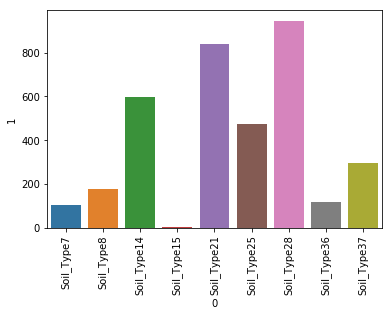

In [18]:
# Check binary variables that have less than 1000 occurences

counts_less = []

print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)
        counts_less.append([col,count])

df_occurence = pd.DataFrame.from_records(counts_less)

sns.barplot(x=df_occurence[0],y=df_occurence[1],data=df_occurence)
plt.xticks(rotation=90)

In [19]:
#the above histogram represents the occurences of different soil types and we can observe that the soil type 
#15 only has 3 occurences and its the most skewed out of all the soil types.
#We can potentially remove this since its not adding any useful input to our analysis. 

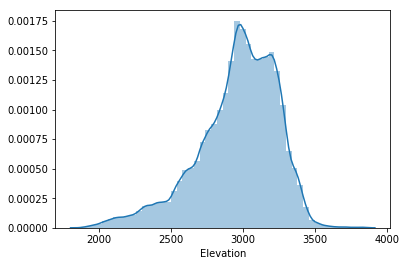

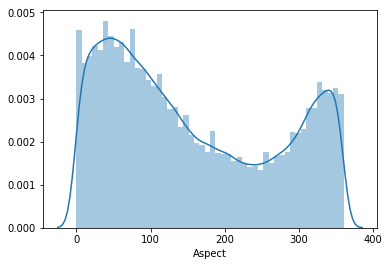

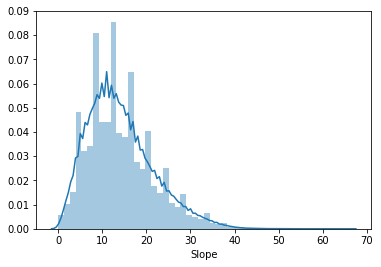

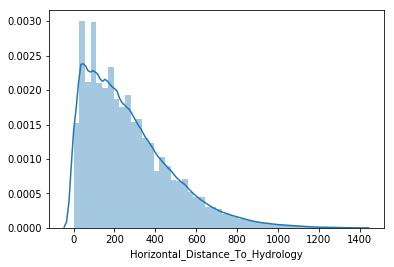

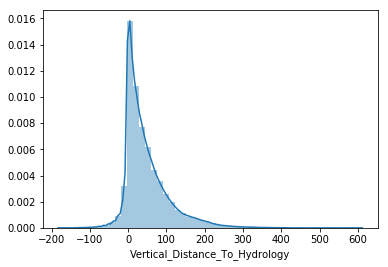

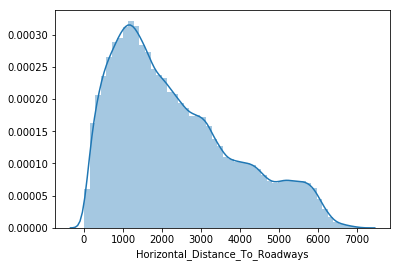

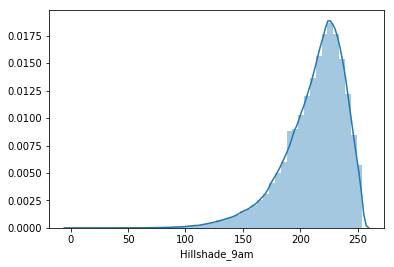

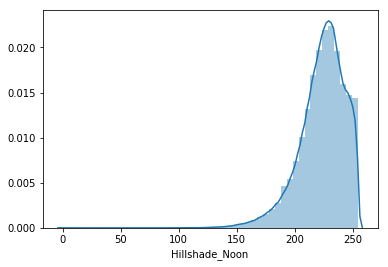

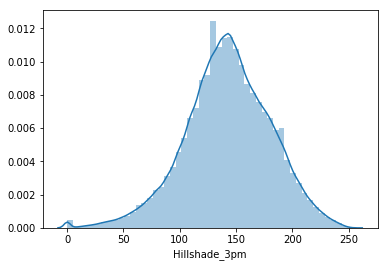

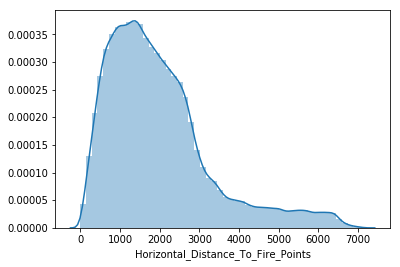

In [20]:
cont_data = forest.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

In [21]:
# sns.set(style="ticks")
# sns.pairplot(forest.iloc[:,0:6])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


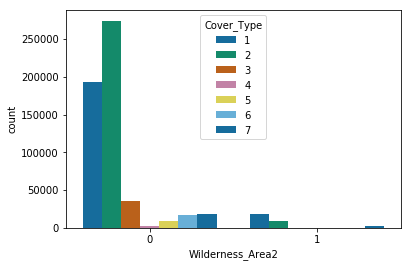

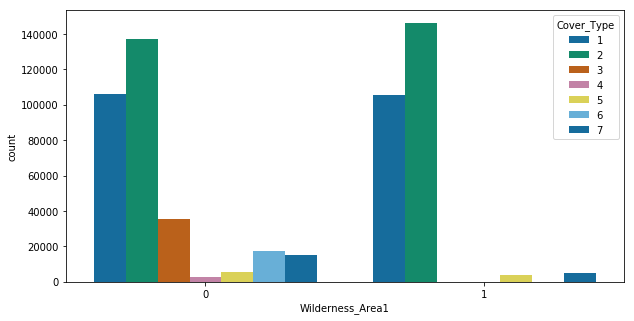

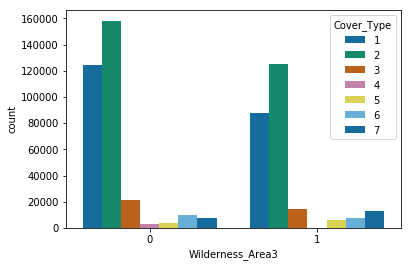

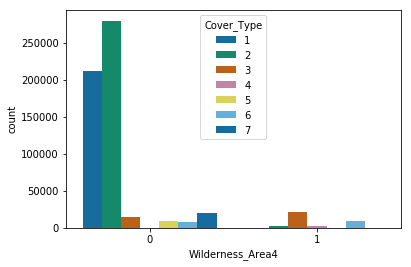

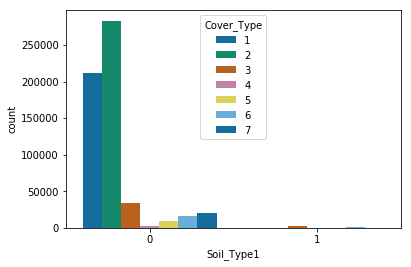

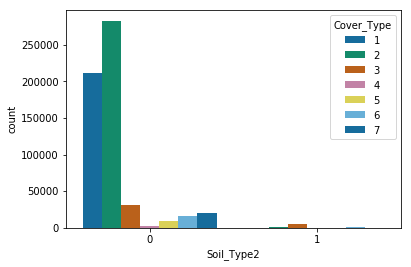

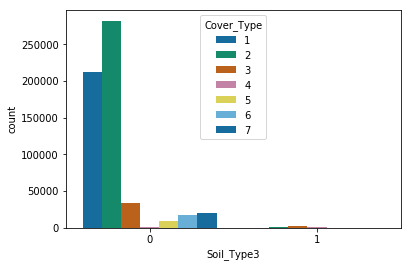

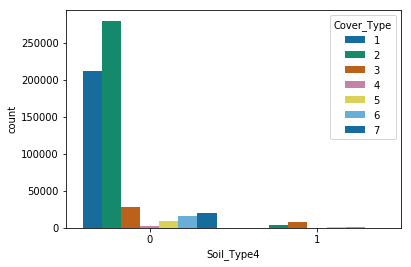

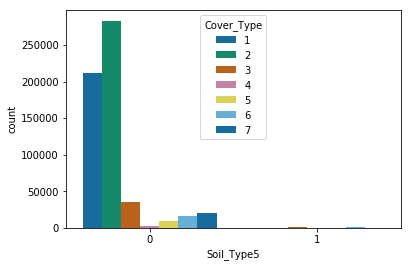

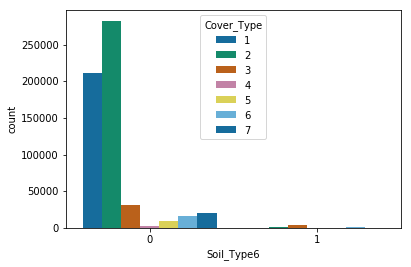

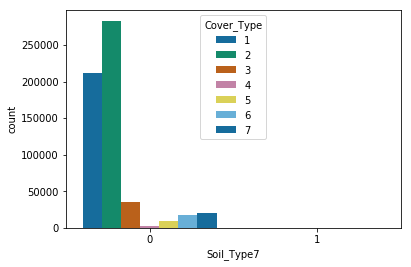

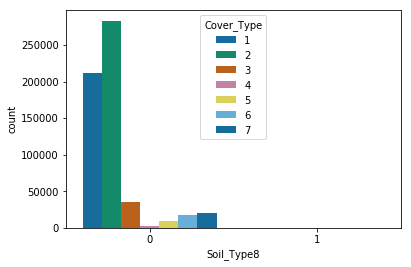

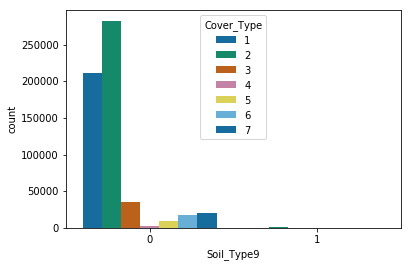

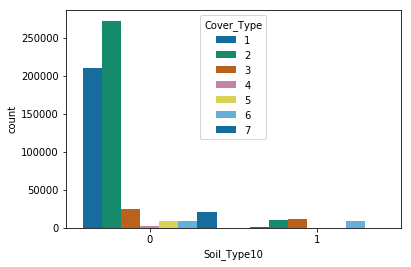

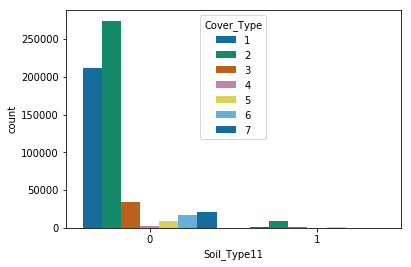

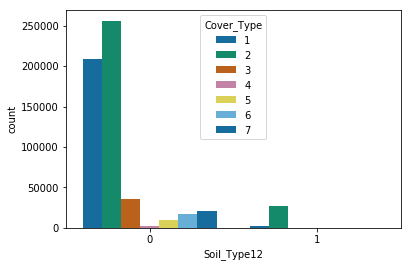

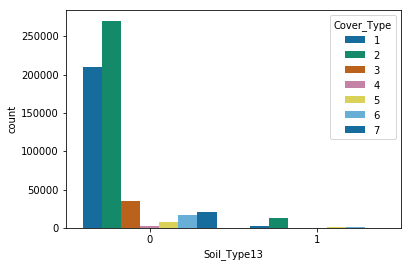

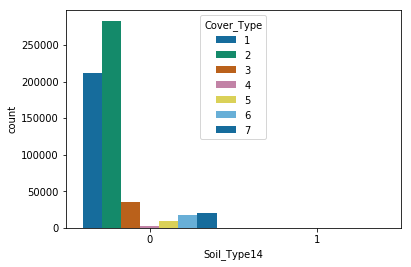

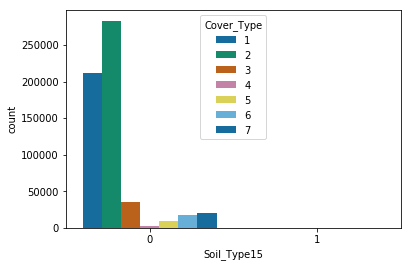

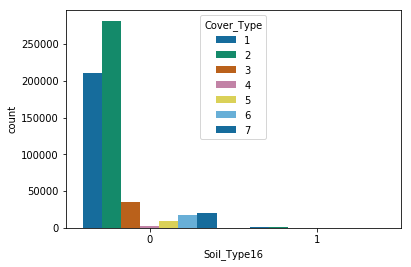

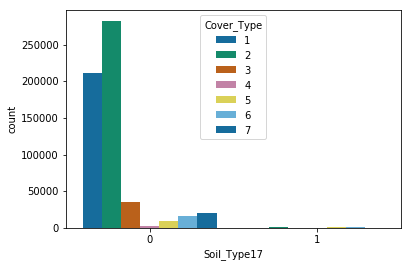

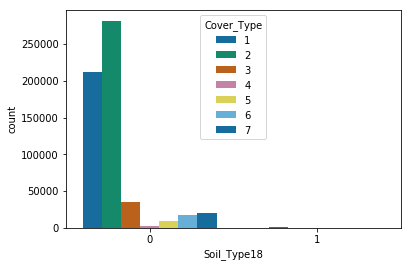

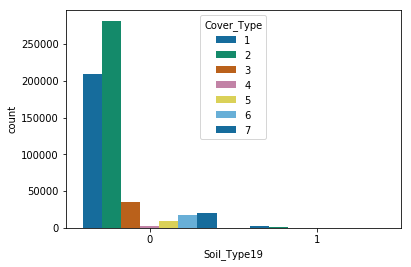

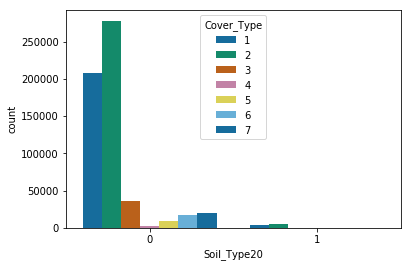

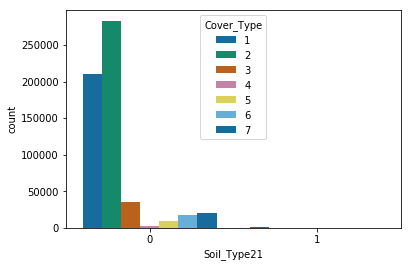

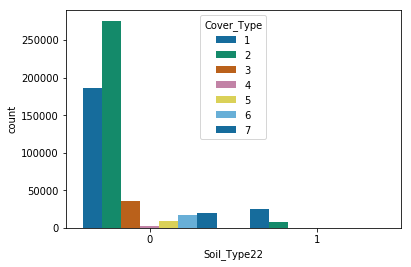

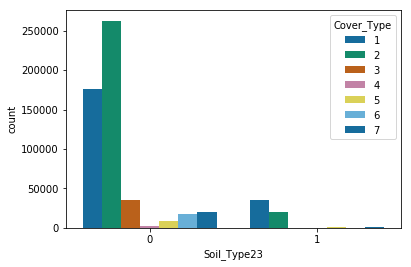

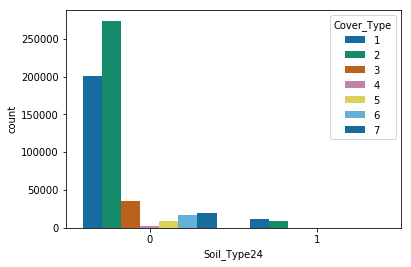

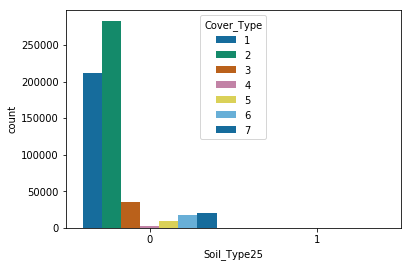

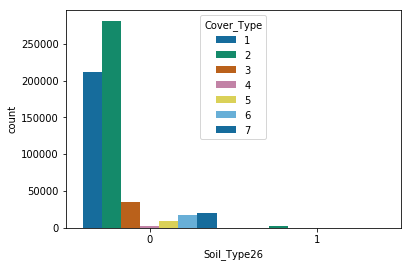

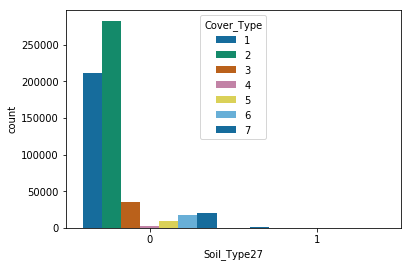

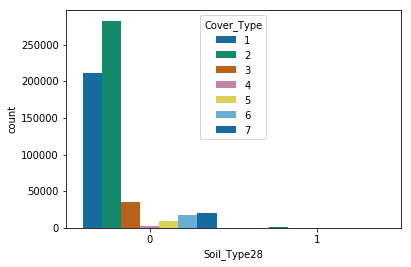

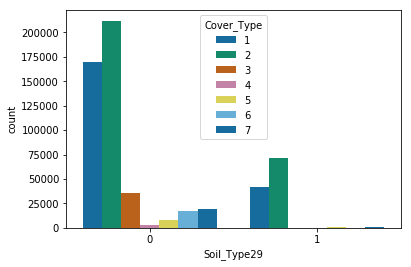

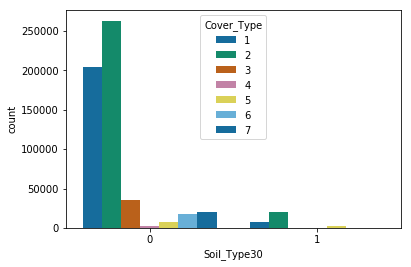

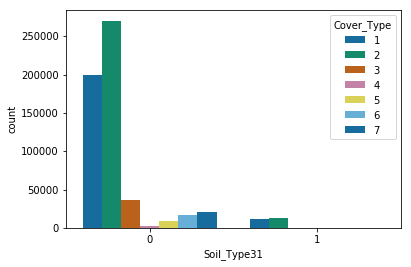

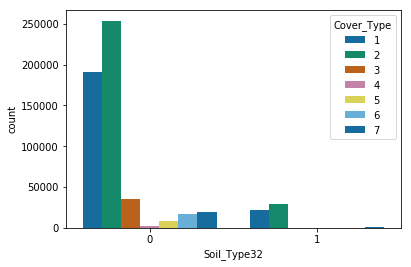

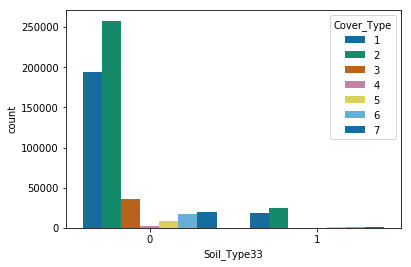

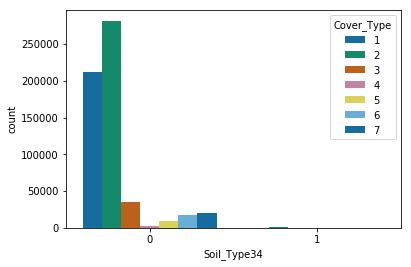

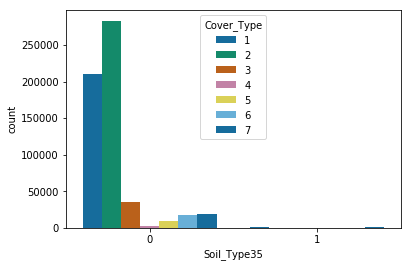

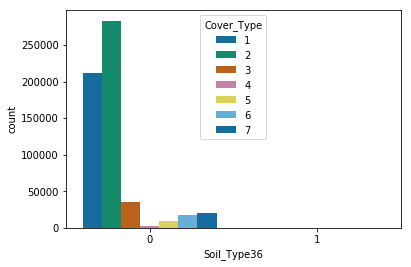

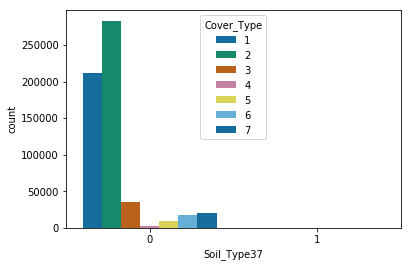

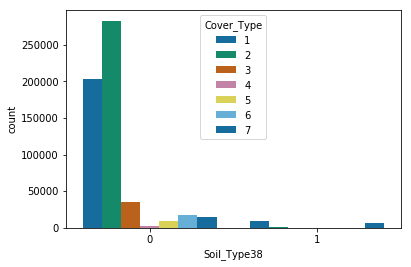

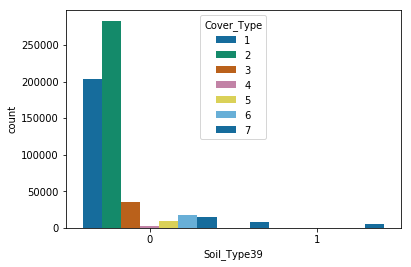

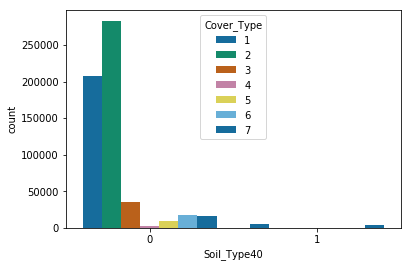

In [22]:
for i, col in enumerate(binary_data.columns):
    plt.figure()
    plt.figure(i,figsize=(10,5))
    sns.countplot(x=col, hue=forest['Cover_Type'] ,data=forest, palette="colorblind")

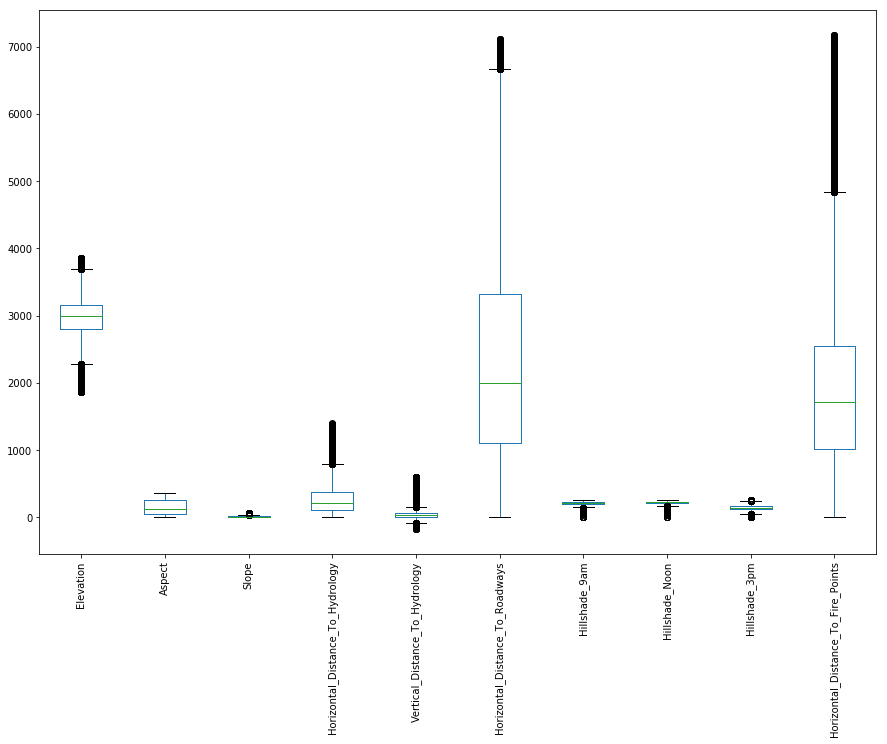

In [23]:
# outlier detection in the continious data
cont_data.head()
cont_data.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [24]:
Q1 = cont_data.quantile(0.25)
Q3 = cont_data.quantile(0.75)
IQR = Q3 - Q1

((cont_data < (Q1 - 1.5 * IQR)) | (cont_data > (Q3 + 1.5 * IQR))).sum()

Elevation                             15569
Aspect                                    0
Slope                                 15316
Horizontal_Distance_To_Hydrology      14557
Vertical_Distance_To_Hydrology        31463
Horizontal_Distance_To_Roadways         669
Hillshade_9am                         17433
Hillshade_Noon                        15672
Hillshade_3pm                          7832
Horizontal_Distance_To_Fire_Points    31156
dtype: int64

In [56]:
#remove outliers
cont_data_out_removed = cont_data[(np.abs(stats.zscore(cont_data)) < 3).all(axis=1)]


In [29]:
cont_data_out_removed.shape

(536431, 10)

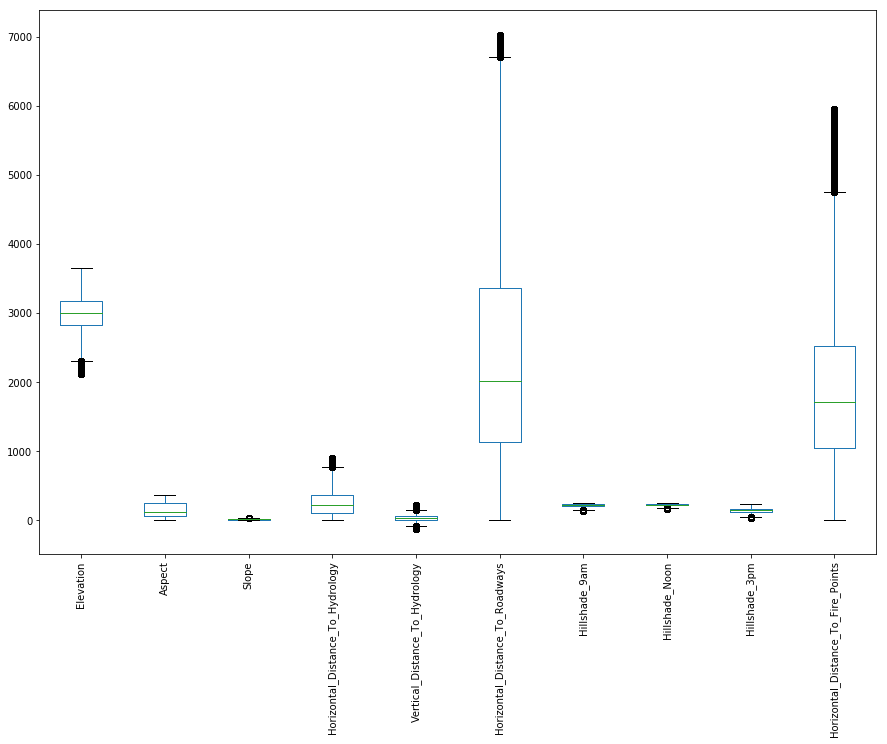

Elevation                              9034
Aspect                                    0
Slope                                  1380
Horizontal_Distance_To_Hydrology       8676
Vertical_Distance_To_Hydrology        24722
Horizontal_Distance_To_Roadways         521
Hillshade_9am                         10704
Hillshade_Noon                         7416
Hillshade_3pm                          3819
Horizontal_Distance_To_Fire_Points    21753
dtype: int64

In [30]:
cont_data_out_removed.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

Q1 = cont_data_out_removed.quantile(0.25)
Q3 = cont_data_out_removed.quantile(0.75)
IQR = Q3 - Q1

((cont_data_out_removed < (Q1 - 1.5 * IQR)) | (cont_data_out_removed > (Q3 + 1.5 * IQR))).sum()



In [31]:


# cont_data_out_removed = df[(np.abs(stats.zscore(forest)) < 3).all(axis=1)]

# cont_data_out_removed.shape
forest_clean = forest.drop(list(df_occurence[0]), axis = 1)
    
print (len(df_occurence))
forest_clean.head()

#removing all binary columns which have occurences < 5800 or 1% of total observations

9


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,1,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


### Spliting Data

In [32]:
y_target = forest_clean['Cover_Type']
X_data = forest_clean.drop(['Cover_Type'],axis = 1)

X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data, y_target, test_size=0.25, random_state=9)

In [33]:
# linear regression
reg = linear_model.LinearRegression()

reg.fit(X_data_train, y_target_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.12438445e-03  3.59288974e-04 -3.74152771e-03  1.42443509e-05
  6.59174530e-04  1.39823146e-05  6.64294313e-04  2.09715692e-03
 -2.52111945e-03  2.58116642e-05 -6.80349077e-01 -1.99347469e-01
  1.70834401e-01  7.08862145e-01 -3.94556339e-01  1.31550361e-02
 -6.17474573e-01 -2.69601243e-01 -1.40019014e-02 -4.26876183e-01
 -5.00564407e-01 -1.09823334e-01 -7.40632515e-01 -2.95233659e-01
 -6.08283776e-01 -2.65416464e-01  3.53314223e-01 -2.90125865e-01
 -6.36406430e-01 -6.04178062e-01 -8.06319849e-01 -7.42635417e-01
 -9.71803609e-01 -8.90030281e-01 -1.06378033e+00 -2.61945621e-01
 -7.71634996e-02 -1.06714782e+00 -9.20094267e-01 -9.56209773e-01
 -6.30539762e-01  2.02642308e+00  1.41167946e+00  1.45702671e+00
  1.67010693e+00] + 5.611450883462471


In [34]:
predicted = reg.predict(X_data_test)
mse = ((np.array(y_target_test)-predicted)**2).sum()/len(y_target_test)
r2 = r2_score(y_target_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1.3599730720904608
R Squared: 0.3069939311087051


In [35]:
y_target = forest['Cover_Type']
X_data = forest.drop(['Cover_Type'],axis = 1)

X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data, y_target, test_size=0.25, random_state=9)

In [36]:
# linear regression
reg = linear_model.LinearRegression()

reg.fit(X_data_train, y_target_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.16087202e-03  3.70608230e-04 -4.23900698e-03  7.67297526e-06
  7.36315639e-04  1.23042905e-05 -1.95121588e-04  2.95005284e-03
 -3.12258624e-03  2.66810343e-05 -6.89511447e-01 -1.81398362e-01
  1.89575707e-01  6.81334102e-01 -3.83851443e-01  2.47628464e-03
 -6.22365032e-01 -2.88321435e-01 -4.91111676e-03 -4.09527508e-01
 -1.13007420e-01 -3.29973199e-01 -4.89507940e-01 -1.08586927e-01
 -7.50798369e-01 -2.76668100e-01 -6.23003687e-01  1.06322703e+00
  1.83205350e+00 -2.53596363e-01  3.42863186e-01 -2.83832360e-01
 -6.15579620e-01 -5.89589817e-01 -1.51204633e+00 -7.86906281e-01
 -7.29356748e-01 -9.69317368e-01 -5.22679173e-01 -8.97992825e-01
 -1.06878605e+00 -9.29249009e-01 -2.34512399e-01 -5.25730623e-02
 -1.06928814e+00 -9.21930155e-01 -9.60629710e-01 -6.39102031e-01
  2.04824024e+00  2.18081468e+00  5.35963817e+00  1.43474080e+00
  1.47934010e+00  1.69409562e+00] + 5.788825976403884


In [37]:
predicted = reg.predict(X_data_test)
mse = ((np.array(y_target_test)-predicted)**2).sum()/len(y_target_test)
r2 = r2_score(y_target_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1.3373703350680664
R Squared: 0.31851168410803166


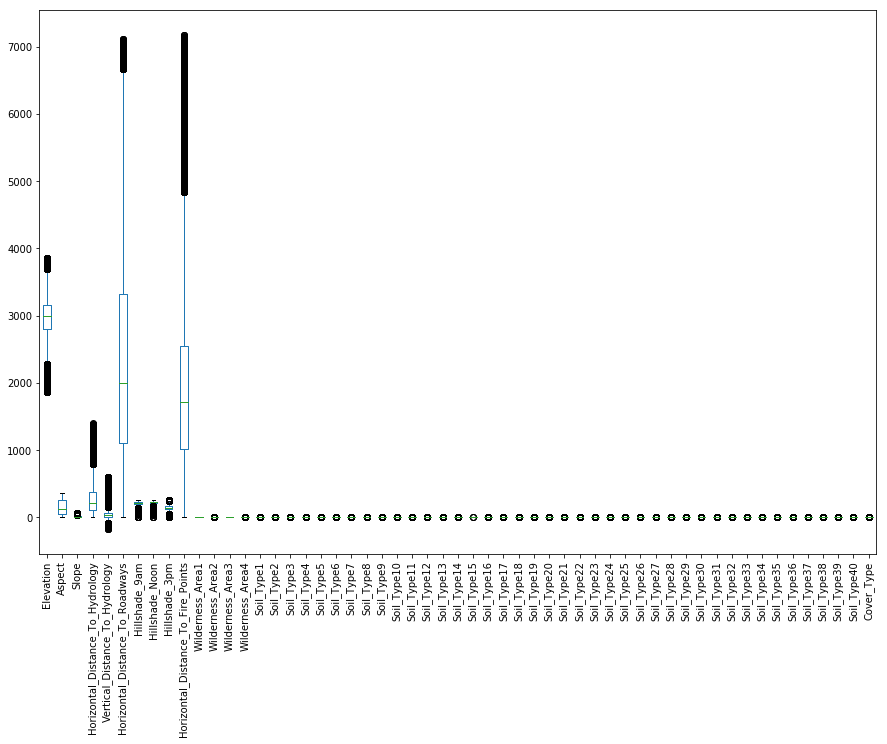

In [39]:
#checking the outliers in the whole forrest data
forest.head()
forest.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [43]:
forest.shape

(581011, 55)

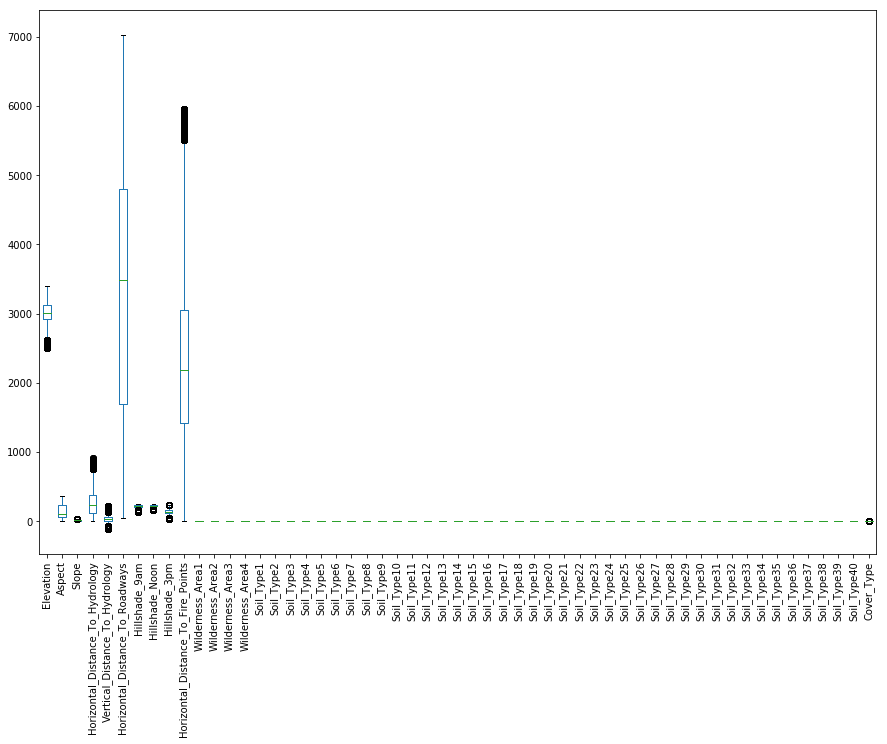

In [42]:
#remove outliers
forest_data_out_removed = forest[(np.abs(stats.zscore(forest)) < 3).all(axis=1)]
forest_data_out_removed.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [41]:
forest_data_out_removed.shape

(107905, 55)

In [66]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
feature_cols= np.array(['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points',
'Wilderness_Area1',
'Wilderness_Area2',
'Wilderness_Area3',
'Wilderness_Area4',
'Soil_Type1',
'Soil_Type2',
'Soil_Type3',
'Soil_Type4',
'Soil_Type5',
'Soil_Type6',
'Soil_Type7',
'Soil_Type8',
'Soil_Type9',
'Soil_Type10',
'Soil_Type11',
'Soil_Type12',
'Soil_Type13',
'Soil_Type14',
'Soil_Type15',
'Soil_Type16',
'Soil_Type17',
'Soil_Type18',
'Soil_Type19',
'Soil_Type20',
'Soil_Type21',
'Soil_Type22',
'Soil_Type23',
'Soil_Type24',
'Soil_Type25',
'Soil_Type26',
'Soil_Type27',
'Soil_Type28',
'Soil_Type29',
'Soil_Type30',
'Soil_Type31',
'Soil_Type32',
'Soil_Type33',
'Soil_Type34',
'Soil_Type35',
'Soil_Type36',
'Soil_Type37',
'Soil_Type38',
'Soil_Type39',
'Soil_Type40',
'Cover_Type'])
estimator= LogisticRegression()
sel= RFE (estimator,100)
sel= sel.fit(X_data,y_target)

supp=sel.get_support(8)
print("Selected features:", feature_cols[supp])
print("Coeffs:", sel.estimator_.coef_)

#testing
predicted=sel.predict(X_data)
print("MSE:", mean_squared_error(y_target, predicted))
print("R^2:", r2_score(y_target, predicted))

Selected features: ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area1'
 'Wilderness_Area2' 'Wilderness_Area3' 'Wilderness_Area4' 'Soil_Type1'
 'Soil_Type2' 'Soil_Type3' 'Soil_Type4' 'Soil_Type5' 'Soil_Type6'
 'Soil_Type7' 'Soil_Type8' 'Soil_Type9' 'Soil_Type10' 'Soil_Type11'
 'Soil_Type12' 'Soil_Type13' 'Soil_Type14' 'Soil_Type15' 'Soil_Type16'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type20' 'Soil_Type21'
 'Soil_Type22' 'Soil_Type23' 'Soil_Type24' 'Soil_Type25' 'Soil_Type26'
 'Soil_Type27' 'Soil_Type28' 'Soil_Type29' 'Soil_Type30' 'Soil_Type31'
 'Soil_Type32' 'Soil_Type33' 'Soil_Type34' 'Soil_Type35' 'Soil_Type36'
 'Soil_Type37' 'Soil_Type38' 'Soil_Type39' 'Soil_Type40']
Coeffs: [[ 6.38181023e-03 -3.44339822e-04 -8.63663664e-02 -1.28879235e-03
  -1.87430279e-03 -8.28180561e-05 -8.51028293e-02

In [69]:
#RFE feature selection
array = forest.values
X = array[:,0:8] #feature 
Y = array[:,8]#target
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

KeyboardInterrupt: 